<a href="https://colab.research.google.com/github/GeulHae/GeulHae/blob/dev_dataAnalysis/CNN(Mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras import Model


In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [3]:
batch_size = 64
num_classes = 10
epochs = 5
lr = 0.0001

In [4]:
def makeCNN():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])


  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])
  return model

In [5]:
def main():

  model = makeCNN()

  hist = model.fit(x_train,
                   y_train,
                   batch_size=batch_size,  # default=32
                   epochs=5)
  
  fig, ax = plt.subplots(figsize=(14, 6))
  
  ax.plot(hist.history['accuracy'])
  plt.legend(['accuracy'])

  ax.set_xlabel('epoch')
  ax.set_ylabel('accuracy')
  
  loss, accuracy = model.evaluate(x_test, y_test)
  print('Accuracy = {:.4f}'.format(accuracy))
  result = {'hist':hist, 'accuracy':accuracy}
  return result

Epoch 1/5
938/938 [==============================] - 15s 5ms/step - loss: 0.7533 - accuracy: 0.7624
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.2825 - accuracy: 0.9138
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.2068 - accuracy: 0.9379
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.1688 - accuracy: 0.9502
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9775
Accuracy = 0.9775


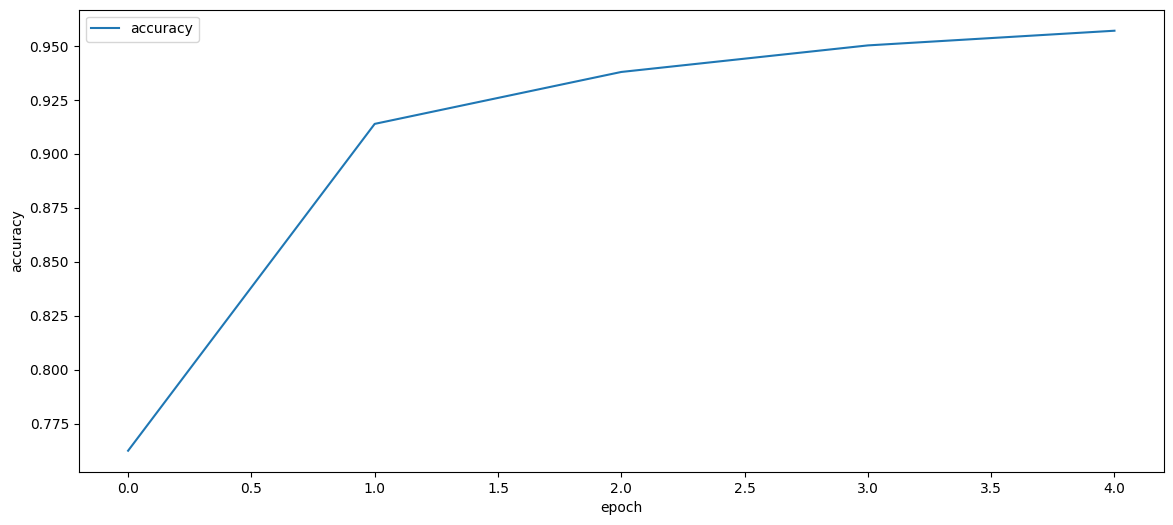

In [6]:
if __name__ == '__main__':
  main()